# Food Inspection Results Prediction
# Advanced Topics in Machine Learning – Final Project

# 1. Imports and Configuration


In [40]:
### CODE BY GPT ###

# Data handling
import numpy as np
import pandas as pd
import re

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



import warnings
warnings.filterwarnings("ignore")

In [41]:
### CODE BY GPT ###

RANDOM_STATE = 42

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

# Food Inspection Results Prediction
# Advanced Topics in Machine Learning – Final Project

# 2.Dataset Loading


In [42]:
### CODE BY GPT ###

DATA_PATH = "https://data.cityofchicago.org/api/views/4ijn-s7e5/rows.csv?accessType=DOWNLOAD"

df = pd.read_csv(DATA_PATH, encoding="latin1")

print("Dataset shape:", df.shape)
display(df.head())

print("\nColumn info:")
df.info()


Dataset shape: (302713, 17)


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1068208,CHINA COURT RESTAURANT,CHINA COURT RESTAURANT,2141795.00,Restaurant,Risk 1 (High),1146 N MILWAUKEE AVE,CHICAGO,IL,60642.00,03/14/2012,License Re-Inspection,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.90,-87.67,"(41.902462266949634, -87.66530609467256)"
1,1072213,CUDDLE CARE,CUDDLE CARE,1622366.00,Daycare Above and Under 2 Years,Risk 1 (High),4800 S LAKE PARK AVE,CHICAGO,IL,60615.00,10/22/2012,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.81,-87.59,"(41.80792179224785, -87.5906931090992)"
2,1072214,CUDDLE CARE,CUDDLE CARE,1622365.00,Daycare Above and Under 2 Years,Risk 1 (High),4800 S LAKE PARK AVE,CHICAGO,IL,60615.00,10/22/2012,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.81,-87.59,"(41.80792179224785, -87.5906931090992)"
3,1072228,SHARKS FISH & CHICKEN,SHARKS FISH & CHICKEN,2069562.00,Restaurant,Risk 2 (Medium),101 E 51ST ST,CHICAGO,IL,60615.00,10/26/2012,Short Form Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.80,-87.62,"(41.80189221533366, -87.62256558837282)"
4,1072252,SALAAM RESTAURANT AND BAKERY,SALAAM RESTAURANT AND BAKERY,2141327.00,Restaurant,Risk 1 (High),700-706 W 79TH ST,CHICAGO,IL,60620.00,01/24/2013,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.75,-87.64,"(41.750787498480555, -87.64166664542023)"



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302713 entries, 0 to 302712
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    302713 non-null  int64  
 1   DBA Name         302713 non-null  object 
 2   AKA Name         300299 non-null  object 
 3   License #        302695 non-null  float64
 4   Facility Type    297433 non-null  object 
 5   Risk             302628 non-null  object 
 6   Address          302713 non-null  object 
 7   City             302540 non-null  object 
 8   State            302647 non-null  object 
 9   Zip              302672 non-null  float64
 10  Inspection Date  302713 non-null  object 
 11  Inspection Type  302712 non-null  object 
 12  Results          302713 non-null  object 
 13  Violations       217980 non-null  object 
 14  Latitude         301677 non-null  float64
 15  Longitude        301677 non-null  float64
 16  Location         301677 

# 3. Target Variable Definition


In [43]:
### CODE BY GPT ###

display(df["Results"].value_counts(dropna=False).to_frame("count"))

df = df[df["Results"].isin(["Pass", "Fail"])].copy()
df["target_fail"] = (df["Results"] == "Fail").astype(int)

print("Shape after filtering Pass/Fail:", df.shape)
display(df["Results"].value_counts().to_frame("count"))
display(df["target_fail"].value_counts().to_frame("count"))

print("target_fail exists?", "target_fail" in df.columns)

,count
Results,
Pass,156508
Fail,58429
Pass w/ Conditions,45125
Out of Business,25085
No Entry,13269
Not Ready,4203
Business Not Located,94


Shape after filtering Pass/Fail: (214937, 18)


,count
Results,
Pass,156508
Fail,58429


,count
target_fail,
0,156508
1,58429


target_fail exists? True


# 4. Data Preprocessing
# 4.1 Feature Selection


In [44]:
### CODE BY GPT ###

selected_features = [
    "Facility Type",
    "Risk",
    "Inspection Type",
    "Inspection Date",
    "Latitude",
    "Longitude"
]

df_model = df[selected_features + ["target_fail"]].copy()

df_model.head(), df_model.shape

(                     Facility Type             Risk        Inspection Type Inspection Date  Latitude  Longitude  target_fail
 0                       Restaurant    Risk 1 (High)  License Re-Inspection      03/14/2012     41.90     -87.67            1
 1  Daycare Above and Under 2 Years    Risk 1 (High)                Canvass      10/22/2012     41.81     -87.59            0
 2  Daycare Above and Under 2 Years    Risk 1 (High)                Canvass      10/22/2012     41.81     -87.59            0
 3                       Restaurant  Risk 2 (Medium)   Short Form Complaint      10/26/2012     41.80     -87.62            0
 4                       Restaurant    Risk 1 (High)                Canvass      01/24/2013     41.75     -87.64            0,
 (214937, 7))

<div dir="rtl">

### המאפיינים שנבחרו מייצגים גורמים מרכזיים אשר עשויים להשפיע על תוצאות ביקורת תברואה.
### סוג המוסד (Facility Type) משקף הבדלים בסטנדרטים תפעוליים בין עסקים שונים, בעוד שרמת הסיכון (Risk) מהווה אינדיקציה ישירה לפוטנציאל ליקויים תברואתיים.
### סוג הביקורת (Inspection Type) מבדיל בין ביקורות שגרתיות לביקורות בעקבות תלונה.
### תאריך הביקורת מאפשר זיהוי דפוסים זמניים, ואילו המאפיינים הגיאוגרפיים (Latitude, Longitude) מאפשרים זיהוי מגמות מרחביות הקשורות לתוצאות הביקורת.

<div>


# 4.2 Handling Missing Values

In [45]:
### CODE BY GPT ###

missing_counts = df_model.isnull().sum()
missing_percent = (missing_counts / len(df_model)) * 100

missing_summary = (
    pd.DataFrame({
        "Missing Count": missing_counts,
        "Missing Percent": missing_percent
    })
    .sort_values("Missing Count", ascending=False)
)

missing_summary

,Missing Count,Missing Percent
Latitude,827,0.38
Longitude,827,0.38
Facility Type,691,0.32
Risk,35,0.02
Inspection Type,1,0.00
Inspection Date,0,0.00
target_fail,0,0.00


In [46]:
### CODE BY GPT ###

categorical_cols = ["Facility Type", "Risk", "Inspection Type"]
for col in categorical_cols:
    df_model[col] = df_model[col].fillna(df_model[col].mode()[0])

numeric_cols = ["Latitude", "Longitude"]
for col in numeric_cols:
    df_model[col] = df_model[col].fillna(df_model[col].median())

In [47]:
### CODE BY GPT ###

df_model.isnull().sum()

Facility Type      0
Risk               0
Inspection Type    0
Inspection Date    0
Latitude           0
Longitude          0
target_fail        0
dtype: int64

<div dir="rtl">

### הערכים החסרים הושלמו באמצעות שיטות המתאימות לסוג המאפיין. 
### מאפיינים קטגוריאליים הושלמו בערך השכיח, ומאפיינים מספריים הושלמו באמצעות החציון, על מנת לשמר את מבנה הנתונים ולמנוע השפעת חריגים.

<div>


# 4.3 Date Processing

In [48]:
### CODE BY GPT ###

df_model["Inspection Date"] = pd.to_datetime(df_model["Inspection Date"])

In [49]:
### CODE BY GPT ###

df_model["Inspection_Year"] = df_model["Inspection Date"].dt.year
df_model["Inspection_Month"] = df_model["Inspection Date"].dt.month
df_model["Inspection_Day"] = df_model["Inspection Date"].dt.day
df_model["Inspection_Weekday"] = df_model["Inspection Date"].dt.weekday

In [50]:
### CODE BY GPT ###

df_model = df_model.drop(columns=["Inspection Date"])

In [51]:
### CODE BY GPT ###

df_model.head(), df_model.shape

(                     Facility Type             Risk        Inspection Type  Latitude  Longitude  target_fail  Inspection_Year  \
 0                       Restaurant    Risk 1 (High)  License Re-Inspection     41.90     -87.67            1             2012   
 1  Daycare Above and Under 2 Years    Risk 1 (High)                Canvass     41.81     -87.59            0             2012   
 2  Daycare Above and Under 2 Years    Risk 1 (High)                Canvass     41.81     -87.59            0             2012   
 3                       Restaurant  Risk 2 (Medium)   Short Form Complaint     41.80     -87.62            0             2012   
 4                       Restaurant    Risk 1 (High)                Canvass     41.75     -87.64            0             2013   
 
    Inspection_Month  Inspection_Day  Inspection_Weekday  
 0                 3              14                   2  
 1                10              22                   0  
 2                10              22     

<div dir="rtl">

### עמודת תאריך הביקורת הומרה לפורמט זמן ופוצלה למאפייני זמן נפרדים.
### פיצול זה מאפשר למודל ללמוד דפוסים עונתיים ומגמות לאורך זמן, בהתאם להגדרות שנקבעו בחלק התיאורטי של הפרויקט.

<div>


# Violation-Based Feature Engineering

In [52]:
### CODE BY GPT ###

if "Violations" not in df_model.columns:
    if "df" in globals() and "Violations" in df.columns:
        df_model["Violations"] = df.loc[df_model.index, "Violations"]
    else:
        raise ValueError(
            "Violations column is missing in df_model, and I couldn't find a global 'df' with a 'Violations' column. "
            "Make sure you still have the original dataframe loaded as 'df'."
        )


viol_text = df_model["Violations"].fillna("").astype(str)

df_model["violations_count"] = viol_text.apply(lambda s: len(re.findall(r"\b\d+\.", s)))

fallback_mask = (df_model["violations_count"] == 0) & (viol_text.str.contains(r"\||\n", regex=True))
df_model.loc[fallback_mask, "violations_count"] = (
    viol_text[fallback_mask]
    .str.split(r"\||\n", regex=True)
    .apply(lambda parts: sum(1 for p in parts if p.strip()))
)

critical_keywords = [
    "rodent", "rats", "mice",
    "sewage",
    "contamination", "contaminated",
    "temperature", "hot", "cold", "refrigerat", "cooler",
    "raw", "undercooked",
    "hand wash", "handwashing", "no soap", "no hot water",
    "vomit", "diarrhea",
    "pest", "insect", "cockroach"
]

crit_pattern = re.compile(r"(" + "|".join(map(re.escape, critical_keywords)) + r")", flags=re.IGNORECASE)

df_model["critical_keyword_hits"] = viol_text.apply(lambda s: len(crit_pattern.findall(s)))

df_model["critical_violation_flag"] = (df_model["critical_keyword_hits"] > 0).astype(int)

df_model["severity_score"] = df_model["violations_count"] * 1 + df_model["critical_keyword_hits"] * 2


df_model = df_model.drop(columns=["Violations"])

df_model[[
    "violations_count",
    "critical_keyword_hits",
    "critical_violation_flag",
    "severity_score"
]].describe()

df_model.head(), df_model.shape

(                     Facility Type             Risk        Inspection Type  Latitude  Longitude  target_fail  Inspection_Year  \
 0                       Restaurant    Risk 1 (High)  License Re-Inspection     41.90     -87.67            1             2012   
 1  Daycare Above and Under 2 Years    Risk 1 (High)                Canvass     41.81     -87.59            0             2012   
 2  Daycare Above and Under 2 Years    Risk 1 (High)                Canvass     41.81     -87.59            0             2012   
 3                       Restaurant  Risk 2 (Medium)   Short Form Complaint     41.80     -87.62            0             2012   
 4                       Restaurant    Risk 1 (High)                Canvass     41.75     -87.64            0             2013   
 
    Inspection_Month  Inspection_Day  Inspection_Weekday violations_count  critical_keyword_hits  critical_violation_flag severity_score  
 0                 3              14                   2                3      

<div dir="rtl">

### בחלק זה בוצע Feature Engineering לעמודת Violations, המכילה תיאור טקסטואלי של ההפרות שנמצאו בביקורת. 
### מכיוון שטקסט גולמי אינו מתאים ישירות למודלים טבלאיים, הופקו ממנו פיצ’רים מספריים פשוטים.
    
### ההנחות המרכזיות היו:
### - מספר ההפרות משקף את כמות הבעיות שנמצאו בעסק.
### - לא כל הפרה שווה בחומרתה – קיימות מילות מפתח המעידות על סיכון תברואתי גבוה.
### - הופעה של הפרה חמורה אחת עשויה להיות משמעותית יותר ממספר הפרות קלות.

### בהתאם לכך נוצרו פיצ’רים לספירת ההפרות, לזיהוי מילות מפתח קריטיות (כגון מזיקים, זיהום וטמפרטורה לא תקינה), וכן ציון חומרה כולל המשלב בין כמות ההפרות לחומרתן.  
### מטרת שלב זה היא לשפר את ייצוג חומרת ההפרות בצורה מוסברת, ללא שימוש בעיבוד טקסט מתקדם.



<div>

In [53]:
### CODE BY GPT ###

df_model["is_weekend"] = df_model["Inspection_Weekday"].isin([5, 6]).astype(int)

df_model["is_winter"] = df_model["Inspection_Month"].isin([11, 12, 1, 2, 3]).astype(int)

possible_cols = [c for c in df_model.columns if "inspection" in c.lower() and "type" in c.lower()]
if len(possible_cols) == 0:
    raise ValueError(
        "Couldn't find an 'Inspection Type' column in df_model. "
        "Please run: print(df_model.columns) and send me the output."
    )

inspection_type_col = possible_cols[0]
print("Using inspection type column:", inspection_type_col)

df_model["is_complaint_inspection"] = (
    df_model[inspection_type_col]
    .astype(str)
    .str.contains("Complaint", case=False, na=False)
    .astype(int)
)

if "Inspection_Day" in df_model.columns:
    df_model = df_model.drop(columns=["Inspection_Day"])

df_model[[
    "Inspection_Month",
    "Inspection_Weekday",
    "is_weekend",
    "is_winter",
    "is_complaint_inspection"
]].head()

Using inspection type column: Inspection Type


,Inspection_Month,Inspection_Weekday,is_weekend,is_winter,is_complaint_inspection
0,3,2,0,1,0
1,10,0,0,0,0
2,10,0,0,0,0
3,10,4,0,0,1
4,1,3,0,1,0


# 4.4 Encoding Categorical Features

In [54]:
### CODE BY GPT ###

categorical_cols = ["Facility Type", "Risk", "Inspection Type"]

df_model = pd.get_dummies(
    df_model,
    columns=categorical_cols,
    drop_first=True
)

In [55]:
### CODE BY GPT ###

df_model.head(), df_model.shape

(   Latitude  Longitude  target_fail  Inspection_Year  Inspection_Month  Inspection_Weekday violations_count  critical_keyword_hits  \
 0     41.90     -87.67            1             2012                 3                   2                3                      7   
 1     41.81     -87.59            0             2012                10                   0                4                      1   
 2     41.81     -87.59            0             2012                10                   0                4                      1   
 3     41.80     -87.62            0             2012                10                   4                2                      2   
 4     41.75     -87.64            0             2013                 1                   3                5                      2   
 
    critical_violation_flag severity_score  is_weekend  is_winter  is_complaint_inspection  Facility Type_(gas station)  \
 0                        1             17           0          1

# 4.5 Feature Reduction

In [56]:
### CODE BY GPT ###

min_positive_ratio = 0.001  # 0.1%

feature_means = df_model.drop(columns=["target_fail"]).mean()
rare_features = feature_means[feature_means < min_positive_ratio].index

df_model_reduced = df_model.drop(columns=rare_features)

df_model_reduced.shape

(214937, 49)

In [57]:
### CODE BY GPT ###

df_model = df_model_reduced.copy()

<div dir="rtl">

### לאחר קידוד קטגוריאלי התקבלה כמות גדולה של מאפיינים בינאריים. 
### על מנת לצמצם מימדיות ולהפחית רעש, הוסרו מאפיינים נדירים המופיעים בשיעור נמוך מאוד של הדגימות.

<div>


# 5.Supervised Learning

In [58]:
### CODE BY GPT ###

X = df_model.drop(columns=["target_fail"])
y = df_model["target_fail"]

In [59]:
### CODE BY GPT ###

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [60]:
### CODE BY GPT ###

X_train.shape, X_test.shape

((171949, 48), (42988, 48))

<div dir="rtl">

###  בשלב זה הוגדר משתנה המטרה (`target_fail`) והופרד משאר המאפיינים.  
### המאפיינים שימשו כ־`X`, והמשתנה `target_fail` שימש כ־`y`.
### לאחר מכן הנתונים חולקו לסט אימון וסט בדיקה באמצעות `train_test_split`, כאשר
### 80% מהנתונים שימשו לאימון המודל 
### 20% מהנתונים שימשו לבדיקה 
### הפרמטר `stratify=y` שומר על אותו יחס בין הצלחות לכישלונות גם ב־train וגם ב־test
### חלוקה זו מאפשרת להעריך את ביצועי המודל על נתונים שלא נראו בזמן האימון, בצורה מהימנה ויציבה.

    
<div>


# 5.1 Logistic Regression

<div dir="rtl">

###  בשלב זה נבנה מודל Logistic Regression כמודל בסיס (Baseline).
### המודל מתאים לבעיות סיווג בינאריות ומשמש נקודת השוואה למודלים מתקדמים יותר בהמשך.



    
<div>


In [61]:
### CODE BY GPT ###

log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("=== Logistic Regression Results ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== Logistic Regression Results ===
Accuracy: 0.8733
ROC-AUC: 0.9012

Confusion Matrix:
[[29967  1335]
 [ 4110  7576]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     31302
           1       0.85      0.65      0.74     11686

    accuracy                           0.87     42988
   macro avg       0.86      0.80      0.83     42988
weighted avg       0.87      0.87      0.87     42988



In [62]:
### CODE BY GPT ###

thresholds = np.arange(0.1, 0.91, 0.05)
rows = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred_t, average="binary"
    )
    rows.append({
        "threshold": round(float(t), 2),
        "precision_fail": precision,
        "recall_fail": recall,
        "f1_fail": f1
    })

threshold_df = pd.DataFrame(rows).sort_values("threshold", ascending=True)
threshold_df

,threshold,precision_fail,recall_fail,f1_fail
0,0.10,0.47,0.92,0.62
1,0.15,0.55,0.86,0.67
2,0.20,0.63,0.81,0.71
3,0.25,0.70,0.77,0.73
4,0.30,0.74,0.74,0.74
5,0.35,0.77,0.72,0.74
6,0.40,0.81,0.69,0.75
7,0.45,0.83,0.67,0.74
8,0.50,0.85,0.65,0.74
9,0.55,0.87,0.62,0.72


In [63]:
### CODE BY GPT ###

CHOSEN_THRESHOLD = 0.35

def eval_with_threshold(model, X_test, y_test, threshold, model_name="Model"):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    print("="*40)
    print(f"{model_name} @ threshold={threshold}")
    print("="*40)
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

eval_with_threshold(log_reg, X_test, y_test, CHOSEN_THRESHOLD, "Logistic Regression")

Logistic Regression @ threshold=0.35

Confusion Matrix:
[[28855  2447]
 [ 3297  8389]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     31302
           1       0.77      0.72      0.74     11686

    accuracy                           0.87     42988
   macro avg       0.84      0.82      0.83     42988
weighted avg       0.86      0.87      0.86     42988



<div dir="rtl">

###  לאחר אימון מודל ה־Logistic Regression בוצע ניתוח של סף ההחלטה (threshold) במטרה לשפר את זיהוי מקרי ה־Fail.  
### בחירת threshold=0.35 הובילה לעלייה משמעותית ב־Recall וב־F1 עבור מחלקת ה־Fail, תוך ירידה קלה ב־Precision.




    
<div>


# 5.2 Decision Tree Classifier

<div dir="rtl">

###  בשלב זה נבנה מודל Decision Tree.
### עץ החלטה מאפשר למודל ללמוד יחסים לא־לינאריים בין הפיצ'רים ומתאים במיוחד למצבים שבהם מודלים לינאריים מתקשים.



    
<div>


In [64]:
### CODE BY GPT ###

dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,        # מגביל עומק כדי לצמצם overfitting
    min_samples_leaf=50  # מונע עלים קטנים מדי
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

acc_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

print("=== Decision Tree Results ===")
print(f"Accuracy: {acc_dt:.4f}")
print(f"ROC-AUC:  {auc_dt:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

=== Decision Tree Results ===
Accuracy: 0.8812
ROC-AUC:  0.9217

Confusion Matrix:
[[29744  1558]
 [ 3551  8135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     31302
           1       0.84      0.70      0.76     11686

    accuracy                           0.88     42988
   macro avg       0.87      0.82      0.84     42988
weighted avg       0.88      0.88      0.88     42988



<div dir="rtl">

### מודל Decision Tree נבחר כמודל לא־לינארי בסיסי, המאפשר ללמוד חוקים ואינטראקציות מורכבות בין מאפיינים שונים.   
### המודל הציג ביצועים טובים בזיהוי מקרי כשל, עם Recall של כ־0.70 ו־F1 של כ־0.77 עבור מחלקת ה־Fail.   
### המודל מצליח לזהות את רוב מקרי הכשל, אך עדיין מפספס חלק מהם .






    
<div>


# 5.3 Random Forest Classifier

<div dir="rtl">

###  מודל Random Forest הוא שילוב של מספר עצים של עצי החלטה שמטרתו לשפר יציבות ולהפחית overfitting לעומת עץ בודד.
### בנוסף נעשה שימוש ב־class_weight="balanced" כדי להתמודד עם חוסר איזון בין המחלקות ולשפר את זיהוי מקרי הכשל (class 1).

    
<div>


In [65]:
### CODE BY GPT ###

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("=== Random Forest Results ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC: {auc:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

eval_with_threshold(rf, X_test, y_test, CHOSEN_THRESHOLD, "Random Forest")

=== Random Forest Results ===
Accuracy: 0.8849
ROC-AUC: 0.9276

Confusion Matrix:
[[29626  1676]
 [ 3271  8415]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     31302
           1       0.83      0.72      0.77     11686

    accuracy                           0.88     42988
   macro avg       0.87      0.83      0.85     42988
weighted avg       0.88      0.88      0.88     42988

Random Forest @ threshold=0.35

Confusion Matrix:
[[28181  3121]
 [ 2370  9316]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     31302
           1       0.75      0.80      0.77     11686

    accuracy                           0.87     42988
   macro avg       0.84      0.85      0.84     42988
weighted avg       0.88      0.87      0.87     42988



<div dir="rtl">

### מודל Random Forest מזהה את רוב מקרי הכשל ומציג איזון טוב בין Precision ל־Recall.


    
<div>


# 5.4 Gradient Boosting Classifier

<div dir="rtl">

### Gradient Boosting הוא מודל שמוסיף עצים קטנים אחד אחרי השני, כך שכל עץ חדש “מתקן” את טעויות העצים הקודמים.


    
<div>


In [66]:
### CODE BY GPT ###

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
y_proba = gb_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("=== Gradient Boosting Results ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

eval_with_threshold(gb_model, X_test, y_test, CHOSEN_THRESHOLD, "Gradient Boosting")

=== Gradient Boosting Results ===
Accuracy: 0.8832
ROC-AUC: 0.9242

Confusion Matrix:
[[29979  1323]
 [ 3700  7986]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     31302
           1       0.86      0.68      0.76     11686

    accuracy                           0.88     42988
   macro avg       0.87      0.82      0.84     42988
weighted avg       0.88      0.88      0.88     42988

Gradient Boosting @ threshold=0.35

Confusion Matrix:
[[28615  2687]
 [ 2797  8889]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     31302
           1       0.77      0.76      0.76     11686

    accuracy                           0.87     42988
   macro avg       0.84      0.84      0.84     42988
weighted avg       0.87      0.87      0.87     42988



<div dir="rtl">

### מודל Gradient Boosting מזהה את רוב מקרי הכשל ומציג יכולת הבחנה טובה בין המחלקות.


    
<div>


# 5.5 Neural Network (Feedforward)

<div dir="rtl">

### רשת נוירונים היא מודל לא-לינארי שמסוגל ללמוד קשרים מורכבים בין מאפיינים.
### בנוסף,היא עשויה לשפר ביצועים כאשר הקשרים בין המשתנים אינם פשוטים.


    
<div>


In [67]:
### CODE BY GPT ###

nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=50,
    random_state=42
)

nn_model.fit(X_train, y_train)

y_pred = nn_model.predict(X_test)
y_proba = nn_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("=== Neural Network Results ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC: {auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== Neural Network Results ===
Accuracy: 0.8741
ROC-AUC: 0.9094

Confusion Matrix:
[[30297  1005]
 [ 4409  7277]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     31302
           1       0.88      0.62      0.73     11686

    accuracy                           0.87     42988
   macro avg       0.88      0.80      0.82     42988
weighted avg       0.87      0.87      0.87     42988



<div dir="rtl">



### מודל Neural Network מזהה חלק ניכר ממקרי הכשל ומציג יכולת הבחנה טובה בין מקרי Pass ו־Fail.



    
<div>



    
<div>


# Model Evaluation and Comparison


In [68]:
### CODE BY GPT ###

results = []

def eval_model(model, X_test, y_test, model_name, eval_mode, threshold=None):
    if eval_mode == "predict()":
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
        threshold_val = "default"
    else:  # predict_proba()+threshold
        y_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)
        threshold_val = threshold

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="binary", pos_label=1, zero_division=0
    )

    results.append({
        "Model": model_name,
        "Eval_Mode": eval_mode,
        "Threshold": threshold_val,
        "Accuracy": acc,
        "ROC_AUC": auc,
        "Precision_Fail": precision,
        "Recall_Fail": recall,
        "F1_Fail": f1
    })
    
eval_model(rf, X_test, y_test, "Random Forest", "predict_proba()+threshold", threshold=0.35)
eval_model(gb_model, X_test, y_test, "Gradient Boosting", "predict_proba()+threshold", threshold=0.35)
eval_model(dt, X_test, y_test, "Decision Tree", "predict()")
eval_model(nn_model, X_test, y_test, "Neural Network", "predict()")
eval_model(log_reg, X_test, y_test, "Logistic Regression", "predict_proba()+threshold", threshold=0.35)

final_table = pd.DataFrame(results)[[
    "Model","Eval_Mode","Threshold","Accuracy","ROC_AUC","Precision_Fail","Recall_Fail","F1_Fail"
]].rename(columns={
    "Eval_Mode": "Eval Mode",
    "ROC_AUC": "ROC-AUC",
    "Precision_Fail": "Precision (Fail)",
    "Recall_Fail": "Recall (Fail)",
    "F1_Fail": "F1 (Fail)"
}).sort_values("ROC-AUC", ascending=False).reset_index(drop=True)

pd.set_option("display.float_format", "{:.2f}".format)

final_table

,Model,Eval Mode,Threshold,Accuracy,ROC-AUC,Precision (Fail),Recall (Fail),F1 (Fail)
0,Random Forest,predict_proba()+threshold,0.35,0.87,0.93,0.75,0.80,0.77
1,Gradient Boosting,predict_proba()+threshold,0.35,0.87,0.92,0.77,0.76,0.76
2,Decision Tree,predict(),default,0.88,0.92,0.84,0.70,0.76
3,Neural Network,predict(),default,0.87,0.91,0.88,0.62,0.73
4,Logistic Regression,predict_proba()+threshold,0.35,0.87,0.90,0.77,0.72,0.74


# Model Performance Heatmap

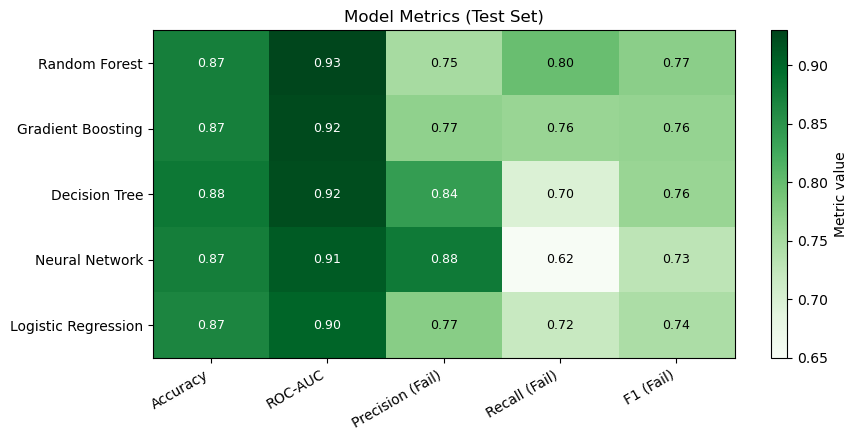

In [69]:
### CODE BY GPT ###

if "final_table" not in globals():
    raise NameError("final_table לא מוגדר. תריצי קודם את התא שמייצר את final_table.")

required_cols = ["Model", "Accuracy", "ROC-AUC", "Precision (Fail)", "Recall (Fail)", "F1 (Fail)"]
missing = [c for c in required_cols if c not in final_table.columns]
if missing:
    raise ValueError(f"final_table חסרות העמודות: {missing}\nבדקי ששמות העמודות תואמים בדיוק.")

metrics = ["Accuracy", "ROC-AUC", "Precision (Fail)", "Recall (Fail)", "F1 (Fail)"]

heat_df = final_table[["Model"] + metrics].set_index("Model")
mat = heat_df.astype(float).values

plt.figure(figsize=(9, 4.5))

im = plt.imshow(
    mat,
    aspect="auto",
    cmap="Greens",
    vmin=0.65,
    vmax=0.93
)

plt.xticks(range(len(metrics)), metrics, rotation=30, ha="right")
plt.yticks(range(len(heat_df.index)), heat_df.index)

text_switch_threshold = 0.82

for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        value = mat[i, j]
        text_color = "white" if value >= text_switch_threshold else "black"
        plt.text(
            j, i,
            f"{value:.2f}",
            ha="center",
            va="center",
            fontsize=9,
            color=text_color
        )

plt.title("Model Metrics (Test Set)")
plt.colorbar(im, label="Metric value")

plt.tight_layout()
plt.show()

<div dir="rtl">

### בפרויקט זה, מודלים פשוטים כגון Logistic Regression הגיעו לביצועים דומים למודלים מורכבים יותר, כגון Random Forest ו-Gradient Boosting.
### תוצאה זו מצביעה על signal חזק בדאטה, המאפשר גם למודלים בעלי מבנה פשוט לזהות את הדפוסים המרכזיים.



    
<div>

# 6. Unsupervised Learning


# Feature Engineering


In [70]:
### CODE BY GPT ###

base_cols = ["Risk", "Latitude", "Longitude", "Zip", "Inspection Date", "Violations"]
df_u = df[base_cols].copy()

df_u = df_u.dropna(subset=["Latitude", "Longitude"])

df_u["Inspection Date"] = pd.to_datetime(df_u["Inspection Date"], errors="coerce")
df_u["Inspection Year"] = df_u["Inspection Date"].dt.year
df_u["Inspection Month"] = df_u["Inspection Date"].dt.month
df_u["Inspection Day Of Week"] = df_u["Inspection Date"].dt.dayofweek  # 0=Mon ... 6=Sun

risk_map = {"Risk 1 (High)": 3, "Risk 2 (Medium)": 2, "Risk 3 (Low)": 1}
df_u["Risk_Num"] = df_u["Risk"].map(risk_map)

df_u["Violations"] = df_u["Violations"].fillna("")
df_u["Num_Violations"] = df_u["Violations"].apply(
    lambda s: len([x for x in s.split("|") if x.strip() != ""])
)

X_unsup = df_u[[
    "Risk_Num",
    "Latitude",
    "Longitude",
    "Zip",
    "Inspection Year",
    "Inspection Month",
    "Inspection Day Of Week",
    "Num_Violations"
]].copy()


X_unsup["Zip"] = pd.to_numeric(X_unsup["Zip"], errors="coerce")


X_unsup = X_unsup.dropna().reset_index(drop=True)

print("X_unsup shape:", X_unsup.shape)
X_unsup.head()

X_unsup shape: (214053, 8)


,Risk_Num,Latitude,Longitude,Zip,Inspection Year,Inspection Month,Inspection Day Of Week,Num_Violations
0,3.00,41.90,-87.67,60642.00,2012,3,2,3
1,3.00,41.81,-87.59,60615.00,2012,10,0,4
2,3.00,41.81,-87.59,60615.00,2012,10,0,4
3,2.00,41.80,-87.62,60615.00,2012,10,4,2
4,3.00,41.75,-87.64,60620.00,2013,1,3,5


# Scaling and Sampling


In [71]:
### CODE BY GPT ###

sample_n = 20000
sample_n = min(sample_n, len(X_unsup))

X_sample = X_unsup.sample(n=sample_n, random_state=42).reset_index(drop=True)

scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

print("X_sample shape:", X_sample.shape)
print("X_sample_scaled shape:", X_sample_scaled.shape)


X_sample shape: (20000, 8)
X_sample_scaled shape: (20000, 8)


# PCA Analysis


Explained variance by PC1 and PC2: [0.21087348 0.18615937]
Total explained variance: 0.397032850992036


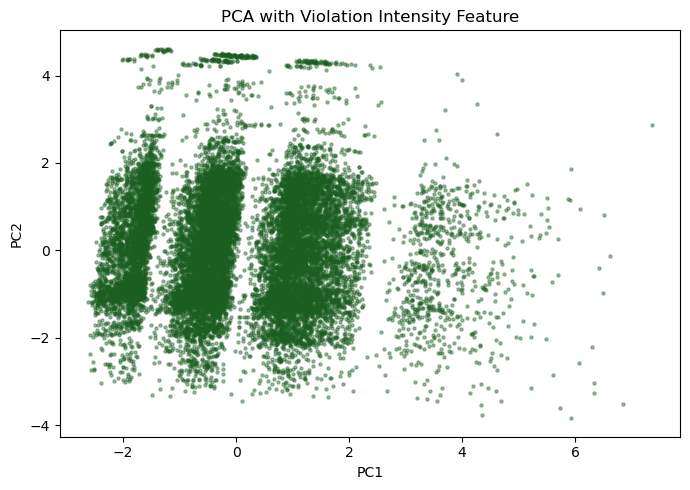

In [72]:
### CODE BY GPT ###

X_enhanced = X_sample.copy()

X_enhanced["Violations_Level"] = pd.cut(
    X_enhanced["Num_Violations"],
    bins=[-1, 0, 3, 10, np.inf],
    labels=[0, 1, 2, 3]
).astype(int)

scaler = StandardScaler()
X_enhanced_scaled = scaler.fit_transform(X_enhanced)

pca = PCA(n_components=2, random_state=42)
X_pca_enhanced = pca.fit_transform(X_enhanced_scaled)

explained_var = pca.explained_variance_ratio_
print("Explained variance by PC1 and PC2:", explained_var)
print("Total explained variance:", explained_var.sum())

plt.figure(figsize=(7, 5))
plt.scatter(
    X_pca_enhanced[:, 0],
    X_pca_enhanced[:, 1],
    s=5,
    alpha=0.4,
    color="#1B5E20"  # ירוק כהה וברור
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA with Violation Intensity Feature")
plt.tight_layout()
plt.show()

<div dir="rtl">

### ניתוח PCA מאפשר לצמצם את הנתונים לשני צירים שניתן להציג בגרף.
### בגרף ניתן לראות מבנה כללי בנתונים, ואף להבחין בחלוקה גסה למספר אזורים או קבוצות לאורך הציר הראשון.
### עם זאת, הקבוצות אינן מופרדות בצורה חדה וקיימת חפיפה ביניהן, ולכן אין חלוקה ברורה לקלאסטרים נפרדים.
### שני הצירים הראשונים מסבירים כ־40% מהשונות בנתונים, מה שמעיד שחלק משמעותי מהמידע נמצא בצירים נוספים שאינם מוצגים בגרף.



    
<div>

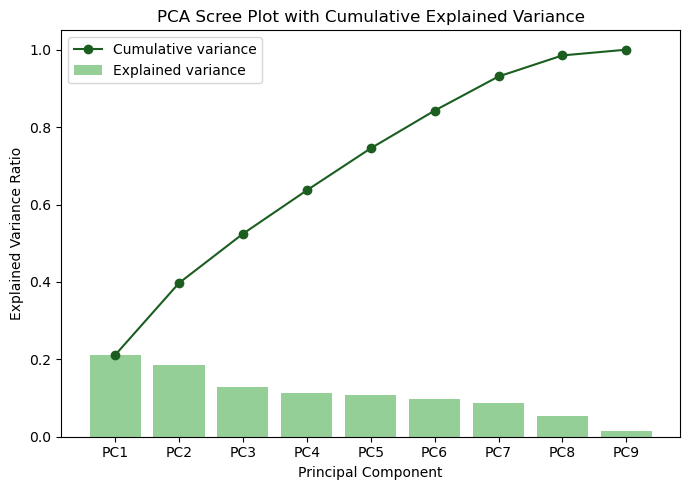

In [73]:
### CODE BY GPT ###

pca_full = PCA(random_state=42)
pca_full.fit(X_enhanced_scaled)

explained_var = pca_full.explained_variance_ratio_
cumulative_var = explained_var. cumsum()

components = range(1, len(explained_var) + 1)
labels = [f"PC{i}" for i in components]

plt.figure(figsize=(7, 5))
plt.bar(
    components,
    explained_var,
    alpha=0.7,
    color="#66BB6A",          
    label="Explained variance"
)
plt.plot(
    components,
    cumulative_var,
    marker="o",
    color="#1B5E20",         
    label="Cumulative variance"
)

plt.xticks(components, labels)  
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Scree Plot with Cumulative Explained Variance")
plt.legend()
plt.tight_layout()
plt.show()


<div dir="rtl">

### בגרף זה, העמודות מייצגות את שיעור השונות שמוסבר על־ידי כל רכיב עיקרי (PC) בנפרד, והקו מייצג את השונות המצטברת שמוסברת על־ידי הרכיבים העיקריים עד אותו רכיב.




    
<div>

# K-Means Clustering


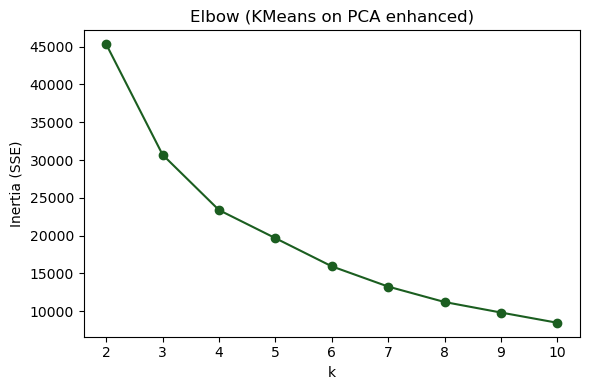

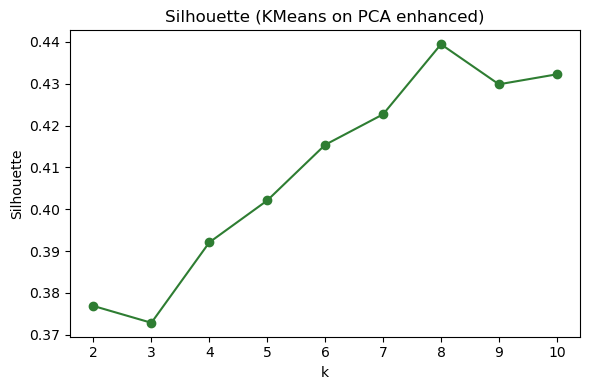

k = 4
Inertia = 23372.94
Silhouette = 0.392


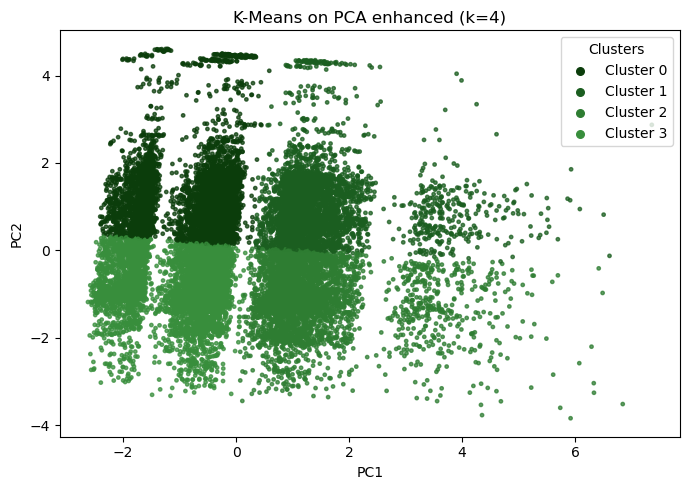

In [74]:
### CODE BY GPT ###

Ks = range(2, 11)
inertias, sils = [], []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca_enhanced)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_pca_enhanced, labels))


plt.figure(figsize=(6,4))
plt.plot(
    list(Ks),
    inertias,
    marker="o",
    color="#1B5E20"
)
plt.xlabel("k")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow (KMeans on PCA enhanced)")
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,4))
plt.plot(
    list(Ks),
    sils,
    marker="o",
    color="#2E7D32"
)
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.title("Silhouette (KMeans on PCA enhanced)")
plt.tight_layout()
plt.show()


k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca_enhanced)

print("k =", k)
print("Inertia =", round(kmeans.inertia_, 2))
print("Silhouette =", round(silhouette_score(X_pca_enhanced, clusters), 3))

# צבע אחד קבוע לכל אשכול (4 ירוקים מובחנים, לא בהירים מדי)
cluster_colors = np.array([
    "#0B3D0B",  # Cluster 0
    "#1B5E20",  # Cluster 1
    "#2E7D32",  # Cluster 2
    "#388E3C"   # Cluster 3
])

plt.figure(figsize=(7,5))
plt.scatter(
    X_pca_enhanced[:, 0],
    X_pca_enhanced[:, 1],
    c=cluster_colors[clusters],   # <<< כאן נועל צבע אחיד לכל cluster
    s=6,
    alpha=0.75
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"K-Means on PCA enhanced (k={k})")

# legend ידני (כדי שיראה תמיד נכון)
for i in range(k):
    plt.scatter([], [], c=cluster_colors[i], s=30, label=f"Cluster {i}")
plt.legend(title="Clusters", loc="best")

plt.tight_layout()
plt.show()


<div dir="rtl">

### תוצאות אלגוריתם K-Means מצביעות על חלוקה של הנתונים לארבעה אשכולות מובחנים, עם הפרדה סבירה ביניהם כפי שנצפה במרחב ה־PCA.
### מדדי Elbow ו-Silhouette תומכים בבחירה זו ומעידים על איזון בין איכות האשכולות לפשטות המודל.




    
<div>

# DBSCAN Clustering


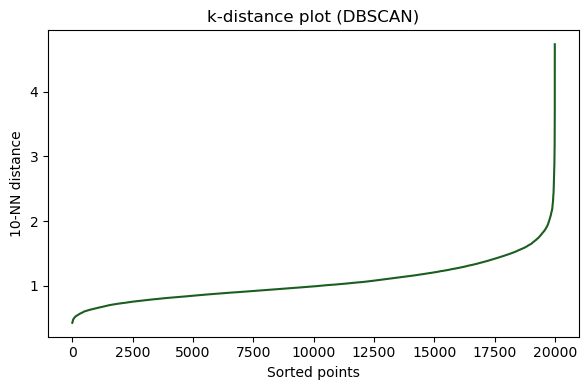

In [75]:
### CODE BY GPT ###

min_samples = 10

nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_enhanced_scaled)

distances, _ = nn.kneighbors(X_enhanced_scaled)
k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(6,4))
plt.plot(
    k_distances,
    color="#1B5E20" 
)
plt.xlabel("Sorted points")
plt.ylabel(f"{min_samples}-NN distance")
plt.title("k-distance plot (DBSCAN)")
plt.tight_layout()
plt.show()

In [76]:
### CODE BY GPT ###

dbscan = DBSCAN(eps=1.4, min_samples=10)
db_labels = dbscan.fit_predict(X_enhanced_scaled)

n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = (db_labels == -1).sum()

print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)
print("Noise percentage:", round(n_noise / len(db_labels) * 100, 2), "%")

Number of clusters: 7
Number of noise points: 992
Noise percentage: 4.96 %


<div dir="rtl">

### DBSCAN זיהה בנתונים תשעה דפוסי התנהגות צפופים, ולצידם כ־5% תצפיות שלא משתלבות באף דפוס נפוץ.
### תצפיות אלו מייצגות מקרים חריגים, כלומר מסעדות עם מאפיינים לא שגרתיים ביחס לרוב הנתונים.



    
<div>

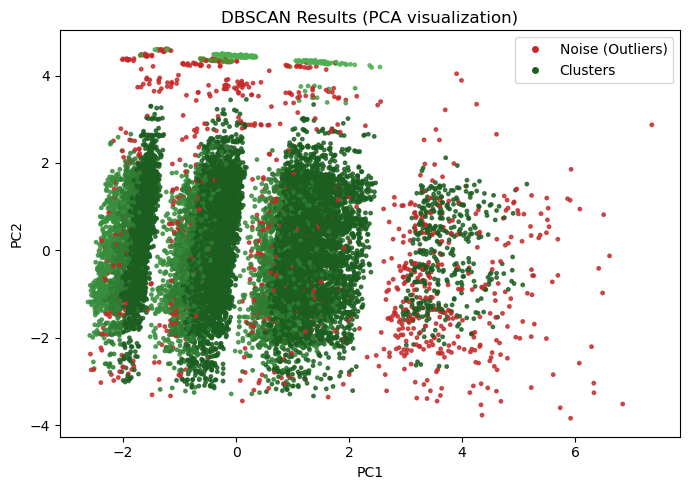

In [77]:
### CODE BY GPT ###

unique_labels = np.unique(db_labels)
n_clusters = len(unique_labels[unique_labels != -1])

# ירוקים לאשכולות
cluster_greens = [
    "#1B5E20",
    "#2E7D32",
    "#388E3C",
    "#4CAF50",
    "#558B2F",
    "#33691E",
    "#43A047",
    "#2F6B3C"
]

cluster_colors = cluster_greens[:n_clusters]

noise_color = "#C62828"  

colors = [noise_color] + cluster_colors
cmap = ListedColormap(colors)


mapped_labels = np.where(db_labels == -1, 0, db_labels + 1)

plt.figure(figsize=(7,5))
plt.scatter(
    X_pca_enhanced[:, 0],
    X_pca_enhanced[:, 1],
    c=mapped_labels,
    cmap=cmap,
    s=6,
    alpha=0.8
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Results (PCA visualization)")

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w',
               label='Noise (Outliers)',
               markerfacecolor=noise_color, markersize=6),
    plt.Line2D([0], [0], marker='o', color='w',
               label='Clusters',
               markerfacecolor=cluster_colors[0], markersize=6)
]

plt.legend(handles=legend_elements, loc="best")

plt.tight_layout()
plt.show()


<div dir="rtl">

### הגרף מציג את תוצאות אלגוריתם DBSCAN במרחב הנתונים, כאשר ההמחשה הוויזואלית מתבצעת לאחר הקרנה באמצעות PCA. אזורים צפופים (אשכולות) מוצגים בגווני ירוק, ואילו נקודות חריגות (Noise) מסומנות באדום. ניתן לראות כי רוב הנתונים מתארגנים לאשכולות ברורים, בעוד שחלק קטן מהנקודות מזוהה כחריג, בעיקר בשולי ההתפלגות.

    
<div>